## Observations and Insights

## Observation 1: Capomulin and Ramicane are the most effective drugs
## Observation 2: Each drug was administered to 25 mice (Propiva had 25 mice, but one was removed as the data was corrupted
## Observation 3: The more a mouse weighs, the larger the tumor. 

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Read the mouse data and the study results
mouse_metadata = pd.read_csv('data/Mouse_metadata.csv')
study_results = pd.read_csv('data/Study_results.csv')

# Combine the data into a single dataset
mouse_results = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
mouse_results.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [19]:
# Checking the number of mice.
num_mice = mouse_results['Mouse ID'].nunique()
num_mice_df = pd.DataFrame({'Total of Mice': [num_mice]})
num_mice_df

,Total of Mice
0,249


In [20]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dup_miceID = study_results[study_results.duplicated(['Mouse ID', 'Timepoint'])]

duplicate_mouse_data = mouse_results.loc[mouse_results['Mouse ID'] =='g989',:]
dup_mice = mouse_results.drop(mouse_results[mouse_results['Mouse ID'] == 'g989'].index, inplace=False)

In [21]:
dup_mice['Mouse ID'].nunique()

248

In [22]:
#removed data
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


## Summary Statistics

In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


def f(x):
    d = {}
   
    d['Mean'] = round(x['Tumor Volume (mm3)'].mean(),2)
    d['Median'] = round(x['Tumor Volume (mm3)'].median(),2)
    d['Variance'] = round(x['Tumor Volume (mm3)'].var(),2)
    d['Standard Deviation'] = round(x['Tumor Volume (mm3)'].std(),2)
    d['SEM'] = round(x['Tumor Volume (mm3)'].sem(),2)
    d['Mice'] = round(x['Mouse ID'].nunique(),2)
   
    return pd.Series(d, index=['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM', 'Mice'])

mice_regimen = dup_mice.groupby('Drug Regimen').apply(f)
mice_regimen


,Mean,Median,Variance,Standard Deviation,SEM,Mice
Drug Regimen,,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33,25.0
Ceftamin,52.59,51.78,39.29,6.27,0.47,25.0
Infubinol,52.88,51.82,43.13,6.57,0.49,25.0
Ketapril,55.24,53.70,68.55,8.28,0.60,25.0
Naftisol,54.33,52.51,66.17,8.13,0.60,25.0
Placebo,54.03,52.29,61.17,7.82,0.58,25.0
Propriva,52.32,50.45,43.85,6.62,0.54,24.0
Ramicane,40.22,40.67,23.49,4.85,0.32,25.0
Stelasyn,54.23,52.43,59.45,7.71,0.57,24.0


In [24]:
# Using the aggregation method, produce the same summary statistics in a single line
mice_regimen2 = dup_mice.groupby('Drug Regimen').agg({'Mouse ID': ['count'],'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

mice_regimen2

Mouse ID Tumor Volume (mm3)                                  \
                count               mean     median        var       std   
Drug Regimen                                                               
Capomulin         230          40.675741  41.557809  24.947764  4.994774   
Ceftamin          178          52.591172  51.776157  39.290177  6.268188   
Infubinol         178          52.884795  51.820584  43.128684  6.567243   
Ketapril          188          55.235638  53.698743  68.553577  8.279709   
Naftisol          186          54.331565  52.509285  66.173479  8.134708   
Placebo           181          54.033581  52.288934  61.168083  7.821003   
Propriva          148          52.320930  50.446266  43.852013  6.622085   
Ramicane          228          40.216745  40.673236  23.486704  4.846308   
Stelasyn          181          54.233149  52.431737  59.450562  7.710419   
Zoniferol         182          53.236507  51.818479  48.533355  6.966589   

                        
                   sem  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.544332  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

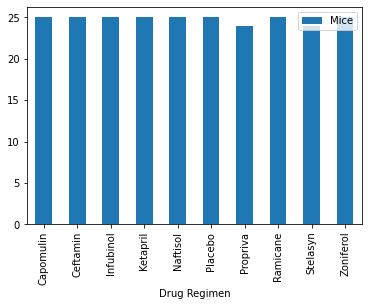

In [25]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

mice_regimen.plot.bar(y= 'Mice', use_index=True)

In [26]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

ticks = [value for value in x_axis]
x_axis = np.arange(0, len(mice_regimen))
plt.figure(figsize=(10,5))
plt.bar(x_axis, mice_regimen['Mice'], width=0.4, color='tomato')
plt.xticks(ticks, mice_regimen.index)
plt.xlabel('Drug Regimen')
plt.ylabel('# of Mice')
plt.title('Mice Testing\n(Drug Regimen)').set_fontsize(10)

NameError: name 'x_axis' is not defined

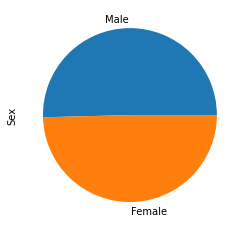

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

dup_mice3= dup_mice.drop_duplicates(subset= ['Mouse ID'], keep= 'last',inplace= False)
dup_mice3['Sex'].value_counts().plot(kind = 'pie')

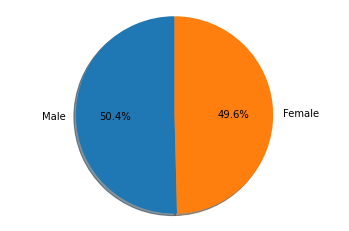

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

male_df = dup_mice3[dup_mice3['Sex'] == 'Male']
male = male_df["Mouse ID"].count()

female_df = dup_mice3[dup_mice3['Sex'] == 'Female']
female = female_df["Mouse ID"].count()

labels = 'Male', 'Female'
sizes = [male, female]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [29]:
dup_mice3= dup_mice.drop_duplicates(subset= ['Mouse ID'], keep= 'last',inplace= False)
dup_mice4 = dup_mice3[dup_mice3['Drug Regimen'] == 'Capomulin']
dup_mice5 = dup_mice3[dup_mice3['Drug Regimen'] == 'Ramicane']
dup_mice6 = dup_mice3[dup_mice3['Drug Regimen'] == 'Infubinol']
dup_mice7 = dup_mice3[dup_mice3['Drug Regimen'] == 'Ceftamin']

mice_tumour_set = pd.concat([dup_mice4, dup_mice5, dup_mice6, dup_mice7])
mice_finaltumour_frame = mice_tumour_set[["Mouse ID","Drug Regimen", "Tumor Volume (mm3)" ]]


# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Make into dataframe

In [30]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

tumour_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

capomulin_iqr = dup_mice4['Tumor Volume (mm3)'].quantile(q = 0.75) - dup_mice4['Tumor Volume (mm3)'].quantile(q = 0.25)
capomulin_q1 =  dup_mice4['Tumor Volume (mm3)'].quantile(q = 0.25)
capomulin_q3 = dup_mice4['Tumor Volume (mm3)'].quantile(q = 0.75)
capomulin_volume = dup_mice4['Tumor Volume (mm3)']

ramicane_iqr = dup_mice5['Tumor Volume (mm3)'].quantile(q = 0.75) - dup_mice5['Tumor Volume (mm3)'].quantile(q = 0.25)
ramicane_q1 =  dup_mice5['Tumor Volume (mm3)'].quantile(q = 0.25)
ramicane_q3 = dup_mice5['Tumor Volume (mm3)'].quantile(q = 0.75)
ramicane_volume = dup_mice5['Tumor Volume (mm3)']

infubinol_iqr = dup_mice6['Tumor Volume (mm3)'].quantile(q = 0.75) - dup_mice6['Tumor Volume (mm3)'].quantile(q = 0.25)
infubinol_q1 =  dup_mice6['Tumor Volume (mm3)'].quantile(q = 0.25)
infubinol_q3 = dup_mice6['Tumor Volume (mm3)'].quantile(q = 0.75)
infubinol_volume = dup_mice6['Tumor Volume (mm3)']

ceftamin_iqr = dup_mice7['Tumor Volume (mm3)'].quantile(q = 0.75) - dup_mice7['Tumor Volume (mm3)'].quantile(q = 0.25)
ceftamin_q1 =  dup_mice7['Tumor Volume (mm3)'].quantile(q = 0.25)
ceftamin_q3 = dup_mice7['Tumor Volume (mm3)'].quantile(q = 0.75)
ceftamin_volume = dup_mice7['Tumor Volume (mm3)']

capomulin_out = capomulin_volume[~((capomulin_volume < (capomulin_q1 - 1.5 * capomulin_iqr)) | (capomulin_volume > (capomulin_q3 + 1.5 * capomulin_iqr)))]
ramicane_out = ramicane_volume[~((ramicane_volume < (ramicane_q1 - 1.5 * ramicane_iqr)) | (ramicane_volume > (ramicane_q3 + 1.5 * ramicane_iqr)))]
infubinol_out = infubinol_volume[~((infubinol_volume < (infubinol_q1 - 1.5 * infubinol_iqr)) | (infubinol_volume > (infubinol_q3 + 1.5 * infubinol_iqr)))]
ceftamin_out = ceftamin_volume[~((ceftamin_volume < (ceftamin_q1 - 1.5 * ceftamin_iqr)) | (ceftamin_volume > (ceftamin_q3 + 1.5 * ceftamin_iqr)))]


capomulin_volume = capomulin_volume.reset_index(drop=True)
ramicane_volume = ramicane_volume.reset_index(drop=True)
infubinol_volume = infubinol_volume.reset_index(drop=True)
ceftamin_volume = ceftamin_volume.reset_index(drop=True)

    

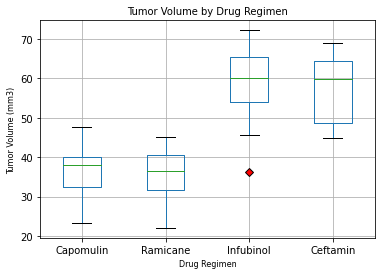

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
mice_drug_frame = pd.concat([capomulin_volume, ramicane_volume, infubinol_volume, ceftamin_volume], axis = 1)
mice_drug_frame.columns = treatments
Outlier = dict(markerfacecolor='r', marker='D')

boxplot = mice_drug_frame.boxplot(column = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], flierprops = Outlier)
plt.title('Tumor Volume by Drug Regimen', fontsize=10)
plt.ylabel('Tumor Volume (mm3)', fontsize=8)
plt.xlabel('Drug Regimen', fontsize=8)

plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Size vs Time')

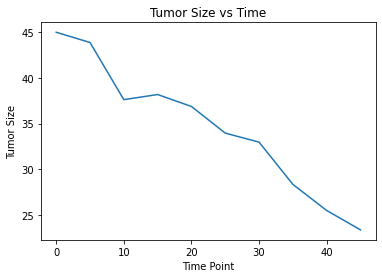

In [32]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

s185_df = dup_mice[dup_mice['Mouse ID'] == 's185']


plt.plot(s185_df['Timepoint'], s185_df['Tumor Volume (mm3)'])

plt.xlabel('Time Point')
plt.ylabel('Tumor Size')
plt.title('Tumor Size vs Time')


<function matplotlib.pyplot.show(*args, **kw)>

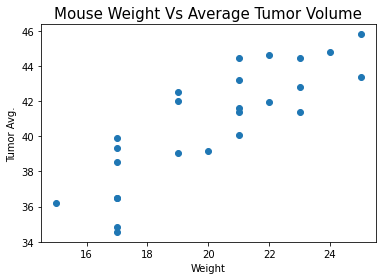

In [33]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# Generate dataframe for Capomulin mice only
capo_mice = dup_mice[dup_mice['Drug Regimen'] == 'Capomulin']

# Group dataframe by Mouse ID, and calculate avg tumour size and weight
capo_mice2 = capo_mice.groupby('Mouse ID').agg({'Tumor Volume (mm3)': ['mean'],'Weight (g)': ['mean']})

# Create Plot
plt.scatter(capo_mice2['Weight (g)'], capo_mice2['Tumor Volume (mm3)'])
plt.xlabel('Weight')
plt.ylabel('Tumor Avg.')
plt.title('Mouse Weight Vs Average Tumor Volume',fontsize =15)


plt.show

## Correlation and Regression

<function matplotlib.pyplot.show(*args, **kw)>

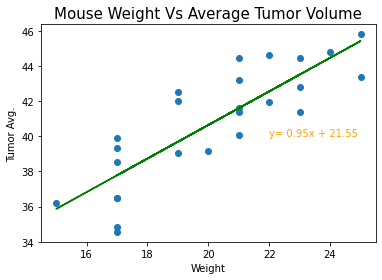

In [36]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
tumor = capo_mice2.iloc[:,0]
weighty = capo_mice2.iloc[:,1]

vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(weighty, tumor) 
vc_fit = vc_slope * weighty + vc_int 

equation = 'y= ' + str(round(vc_slope, 2)) + 'x + ' + str(round(vc_int, 2))

plt.scatter(weighty,tumor)
plt.plot(weighty,vc_fit,"-", color = 'green')
plt.title('Mouse Weight Vs Average Tumor Volume',fontsize =15)
plt.xlabel('Weight')
plt.ylabel('Tumor Avg.')
plt.annotate(equation, xy=(22, 40), fontsize=10, color='orange')

plt.show
